## Extensions

In [20]:
import numpy as np
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt
from localization import datasets
from localization import models
from localization import samplers
from localization.experiments import supervise, autoencode, simulate, simulate_or_load, make_key
from localization.utils import ipr, plot_receptive_fields, plot_rf_evolution, build_gaussian_covariance, build_non_gaussian_covariance, entropy_sort, build_DRT
from scipy.special import erf
from tqdm import tqdm
import itertools

In [21]:
data_config = dict(
  # Data
  key=jax.random.PRNGKey(0),
  num_dimensions=40,
  # num_dimensions=100,
  dim=1,
  xi=(1, 3,),
  adjust=(-1.0, 1.0),
  class_proportion=0.5,
)

config = dict(
  # Model
  optimizer_fn=optax.sgd, 
  num_steps=5000, num_epochs=5000,
  # num_steps=2000, num_epochs=2000,
  sampler_cls=samplers.EpochSampler,
  init_fn=models.xavier_normal_init,
  loss_fn='mse',
  save_=True,
  evaluation_interval=100,
  # Misc
  supervise=True,
  wandb_=False, 
)
config.update(data_config)
config.pop('key')

Array([0, 0], dtype=uint32)

### Soft-committee machine setting

In [97]:
weights, metrics = simulate_or_load(
  # dataset_cls=datasets.NonlinearGPDataset, gain=100,
  dataset_cls=datasets.NortaDataset, marginal_qdf=datasets.AlgQDF(10),
  num_hiddens=10,
  init_scale=0.1,
  activation='sigmoid',
  model_cls=models.SimpleNet,
  use_bias=True, bias_trainable=True,#False, bias_value=-0.4,
  learning_rate=100.0, batch_size=1000, **config
)

fig, axs = plot_rf_evolution(weights, num_rows=2, num_cols=5, figsize=(8, 4))
for ax in axs.flatten():
  ax.set_xticks([])#; ax.set_yticks([])
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
fig.savefig('../figures/fig5/10erf_alg10.pdf', bbox_inches='tight')

Approximate standard deviation: 0.6050050464262096
NortaDataset[-1.00,01.00]_xi1=03.00_xi2=01.00AlgQDF10_p=0.50_batch_size=1000_num_epochs=5000_loss=mse_lr=100.000_SimpleNet_L=100_K=010_activation=sigmoid_init_scale=0.100_xavier_normal_init
File NortaDataset[-1.00,01.00]_xi1=03.00_xi2=01.00AlgQDF10_p=0.50_batch_size=1000_num_epochs=5000_loss=mse_lr=100.000_SimpleNet_L=100_K=010_activation=sigmoid_init_scale=0.100_xavier_normal_init.npz not found
Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'sigmoid',
 'adjust': (-1.0, 1.0),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 1000,
 'bias_trainable': True,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.norta.NortaDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 100,
 'gain': None,
 'init_fn': <function xavier_normal_init at 0x142553920>,
 'init_scale': 0.1,
 'kwargs': {},
 'learning_rate': 100.0,
 'loss_fn': 'mse

In [ ]:
from tueplots import bundles
plt.rcParams.update(bundles.neurips2024())
fig, axs = plot_rf_evolution(weights, num_rows=2, num_cols=5, figsize=(8, 4))
for ax in axs.flatten():
  ax.set_xticks([])#; ax.set_yticks([])
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
fig.savefig('../figures/fig5/10erf_alg10_neurips.pdf', bbox_inches='tight')

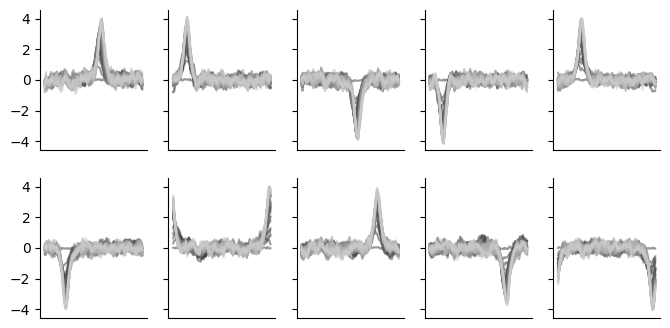

In [96]:
weights, metrics = simulate_or_load(
  # dataset_cls=datasets.NonlinearGPDataset, gain=100,
  dataset_cls=datasets.NortaDataset, marginal_qdf=datasets.AlgQDF(30),
  num_hiddens=10,
  init_scale=0.1,
  activation='sigmoid',
  model_cls=models.SimpleNet,
  use_bias=True, bias_trainable=True,#False, bias_value=-0.4,
  learning_rate=100.0, batch_size=1000, **config
)


fig, axs = plot_rf_evolution(weights, num_rows=2, num_cols=5, figsize=(8, 4))
for ax in axs.flatten():
  ax.set_xticks([])#; ax.set_yticks([])
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
fig.savefig('../figures/fig5/10erf_alg30.pdf', bbox_inches='tight')

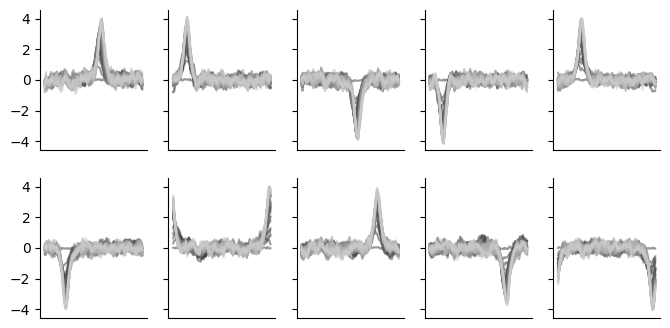

In [23]:
weights, metrics = simulate_or_load(
  # dataset_cls=datasets.NonlinearGPDataset, gain=100,
  dataset_cls=datasets.NortaDataset, marginal_qdf=datasets.AlgQDF(30),
  num_hiddens=10,
  init_scale=0.1,
  activation='sigmoid',
  model_cls=models.SimpleNet,
  use_bias=True, bias_trainable=True,#False, bias_value=-0.4,
  learning_rate=100.0, batch_size=1000, **config
)

fig, axs = plot_rf_evolution(weights, num_rows=2, num_cols=5, figsize=(8, 4))
for ax in axs.flatten():
  ax.set_xticks([])#; ax.set_yticks([])
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
fig.savefig('../figures/fig5/10erf_alg30.pdf')

Approximate standard deviation: 0.7745461679507035
NortaDataset[-1.00,01.00]_xi1=03.00_xi2=01.00AlgQDF4_p=0.50_batch_size=1000_num_epochs=5000_loss=mse_lr=100.000_SimpleNet_L=100_K=010_activation=sigmoid_init_scale=0.100_xavier_normal_init
File NortaDataset[-1.00,01.00]_xi1=03.00_xi2=01.00AlgQDF4_p=0.50_batch_size=1000_num_epochs=5000_loss=mse_lr=100.000_SimpleNet_L=100_K=010_activation=sigmoid_init_scale=0.100_xavier_normal_init.npz not found
Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'sigmoid',
 'adjust': (-1.0, 1.0),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 1000,
 'bias_trainable': True,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.norta.NortaDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 100,
 'gain': None,
 'init_fn': <function xavier_normal_init at 0x142553920>,
 'init_scale': 0.1,
 'kwargs': {},
 'learning_rate': 100.0,
 'loss_fn': 'mse',

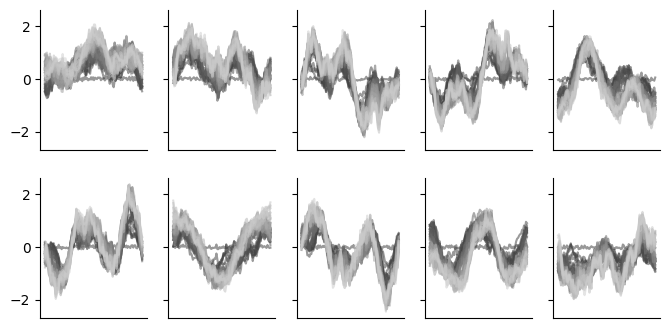

In [101]:
weights, metrics = simulate_or_load(
  dataset_cls=datasets.NortaDataset, marginal_qdf=datasets.AlgQDF(4),
  num_hiddens=10,
  init_scale=0.1,
  activation='sigmoid',
  model_cls=models.SimpleNet,
  use_bias=True, bias_trainable=True,#False, bias_value=-0.4,
  learning_rate=100.0, batch_size=1000, **config
)

fig, axs = plot_rf_evolution(weights, num_rows=2, num_cols=5, figsize=(8, 4))
for ax in axs.flatten():
  ax.set_xticks([])#; ax.set_yticks([])
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
fig.savefig('../figures/fig5/10erf_alg4.pdf', bbox_inches='tight')

In [ ]:
# Picking components localized in center (looks nicer)
m = jnp.max(jnp.abs(W))
for i in range(8):
    fig, ax = plt.subplots(figsize=(2,2))
    im = ax.plot(W[i], color='k', lw=2)
    ax.set_xticks([]); ax.set_yticks([-1, 0, 1]); ax.set_ylim(-1.6, 1.6)
    # remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # cbar = plt.colorbar(im)
    fig.savefig(f'fig5/ica/{i+1}-1d-blob.pdf', bbox_inches='tight')#, size=(2, 2))
    plt.close(fig)

### General two-layer network setting

#### 10 sigmoid (NLGP)

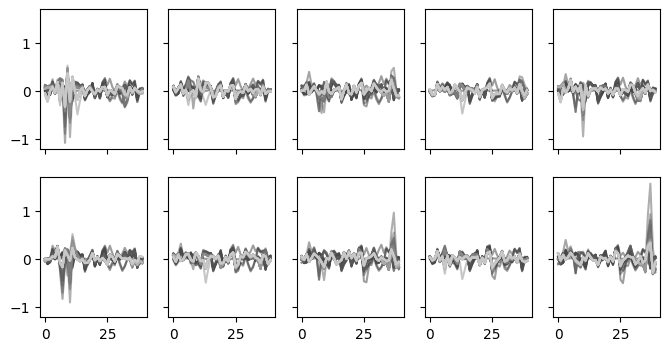

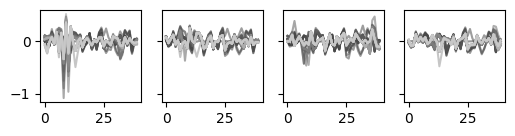

In [27]:
# weights, metrics = simulate_or_load(
#   dataset_cls=datasets.NortaDataset, marginal_qdf=datasets.AlgQDF(4),
#   num_hiddens=10,
#   init_scale=0.001,
#   activation='sigmoid',
#   model_cls=models.MLP,
#   use_bias=True, bias_trainable=True,#False, bias_value=-0.4,
#   learning_rate=80., batch_size=1000, **config
# )
# weights4 = weights
# All
fig, axs = plot_rf_evolution(weights4, num_rows=2, num_cols=5, figsize=(8, 4))
fig.savefig('fig6/10erf_alg4/all.pdf', bbox_inches='tight')
# Subset of 4 to focus on
fig, axs = plot_rf_evolution(weights4[:,[0,1,2,3],:], num_rows=1, num_cols=4, figsize=(6, 1.2))
fig.savefig('fig6/10erf_alg4/subset4.pdf', bbox_inches='tight')
# Individual
# for i in range(10):
#     fig, ax = plot_rf_evolution(weights[:,[i],:], num_rows=1, num_cols=1, figsize=(2, 2))
#     ax.set_xticks([]); ax.set_yticks([-1,0,1]); ax.set_ylim(-1.5, 1.5)
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     # fig.savefig(f'fig6/10erf_alg4/{i+1}-rf.pdf', bbox_inches='tight')
#     plt.close(fig)

Approximate standard deviation: 0.580435177819239
NortaDataset[-1.00,01.00]_xi1=03.00_xi2=01.00AlgQDF30_p=0.50_batch_size=200_num_epochs=5000_loss=mse_lr=2.000_MLP_L=040_K=100_activation=relu_init_scale=0.001_xavier_normal_init
File NortaDataset[-1.00,01.00]_xi1=03.00_xi2=01.00AlgQDF30_p=0.50_batch_size=200_num_epochs=5000_loss=mse_lr=2.000_MLP_L=040_K=100_activation=relu_init_scale=0.001_xavier_normal_init.npz not found
Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'relu',
 'adjust': (-1.0, 1.0),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 200,
 'bias_trainable': True,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.norta.NortaDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 100,
 'gain': None,
 'init_fn': <function xavier_normal_init at 0x148e9d620>,
 'init_scale': 0.001,
 'kwargs': {},
 'learning_rate': 2.0,
 'loss_fn': 'mse',
 'marginal_adjust': <funct

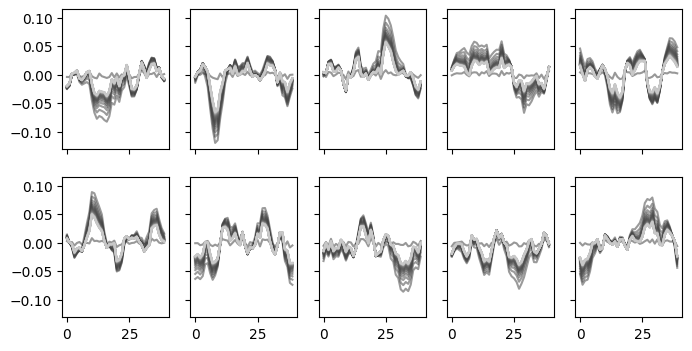

In [10]:
weights, metrics = simulate_or_load(
  dataset_cls=datasets.NortaDataset, marginal_qdf=datasets.AlgQDF(30),
  # dataset_cls=datasets.NonlinearGPDataset, gain=100,
  num_hiddens=100,
  init_scale=0.001,
  activation='relu',
  model_cls=models.MLP,
  use_bias=True, bias_trainable=True,# bias_value=-0.4,
  learning_rate=20*0.1, batch_size=200, **config # prev with lr=1.
)
fig, axs = plot_rf_evolution(weights, num_rows=2, num_cols=5, figsize=(8, 4))
# fig, axs = plot_rf_evolution(weights, num_rows=1, num_cols=1, figsize=(8, 4))

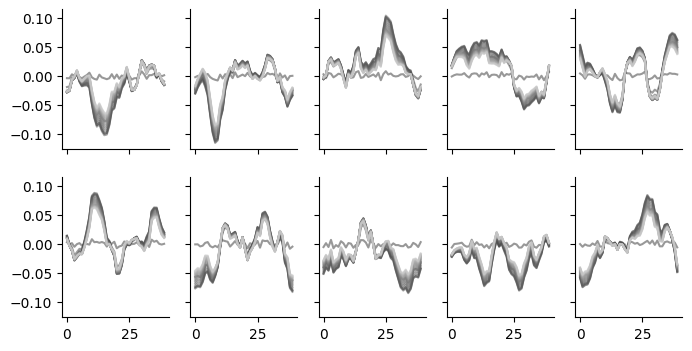

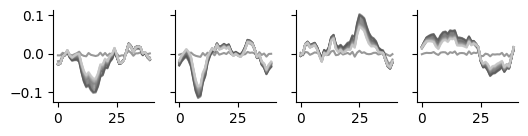

In [29]:
# config_ = config.copy(); config_['num_steps'] = 2000; config_['num_epochs'] = 2000
# weights30, metrics = simulate_or_load(
#   dataset_cls=datasets.NortaDataset, marginal_qdf=datasets.AlgQDF(30),
#   # dataset_cls=datasets.NonlinearGPDataset, gain=100,
#   num_hiddens=100,
#   init_scale=0.001,
#   activation='relu',
#   model_cls=models.MLP,
#   use_bias=True, bias_trainable=True,# bias_value=-0.4,
#   learning_rate=5*0.1, batch_size=5000, **config_ # prev with lr=1.
# )
# All
fig, axs = plot_rf_evolution(weights30, num_rows=2, num_cols=5, figsize=(8, 4))
for ax in axs.flatten(): ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
fig.savefig('fig6/10erf_alg30/all.pdf', bbox_inches='tight')
# Subset of 4 to focus on
fig, axs = plot_rf_evolution(weights30[:,[0,1,2,3],:], num_rows=1, num_cols=4, figsize=(6, 1.2))
for ax in axs.flatten(): ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
fig.savefig('fig6/10erf_alg30/subset4.pdf', bbox_inches='tight')
# # Individual
# for i in range(10):
#     fig, ax = plot_rf_evolution(weights[:,[i],:], num_rows=1, num_cols=1, figsize=(2, 2))
#     ax.set_xticks([]); ax.set_yticks([-0.1,0,0.1]); ax.set_ylim(-0.12, 0.12)
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     fig.savefig(f'fig6/10erf_alg30/{i+1}-rf.pdf', bbox_inches='tight')
#     plt.close(fig)
# fig, axs = plot_rf_evolution(weights, num_rows=1, num_cols=1, figsize=(8, 4))

Approximate standard deviation: 0.580435177819239
NortaDataset[-1.00,01.00]_xi1=03.00_xi2=01.00AlgQDF30_p=0.50_batch_size=200_num_epochs=5000_loss=mse_lr=50.000_MLP_L=040_K=100_activation=sigmoid_init_scale=0.001_xavier_normal_init
File NortaDataset[-1.00,01.00]_xi1=03.00_xi2=01.00AlgQDF30_p=0.50_batch_size=200_num_epochs=5000_loss=mse_lr=50.000_MLP_L=040_K=100_activation=sigmoid_init_scale=0.001_xavier_normal_init.npz not found
Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'sigmoid',
 'adjust': (-1.0, 1.0),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 200,
 'bias_trainable': True,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.norta.NortaDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 100,
 'gain': None,
 'init_fn': <function xavier_normal_init at 0x148e9d620>,
 'init_scale': 0.001,
 'kwargs': {},
 'learning_rate': 50,
 'loss_fn': 'mse',
 'marginal_adjus

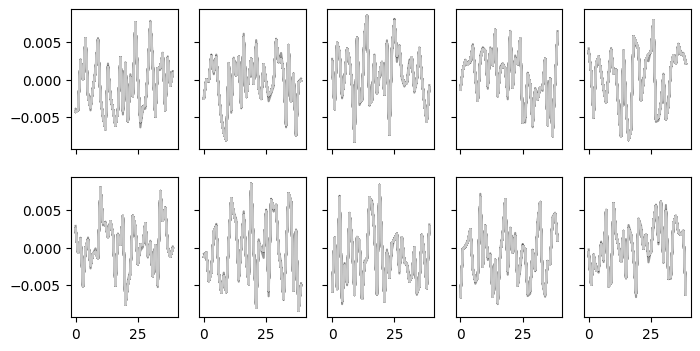

In [19]:
weights, metrics = simulate_or_load(
  dataset_cls=datasets.NortaDataset, marginal_qdf=datasets.AlgQDF(30),
  # dataset_cls=datasets.NonlinearGPDataset, gain=100,
  num_hiddens=100,
  init_scale=0.001,
  activation='sigmoid',
  model_cls=models.MLP,
  use_bias=True, bias_trainable=True,# bias_value=-0.4,
  learning_rate=50, batch_size=200, **config
)
fig, axs = plot_rf_evolution(weights, num_rows=2, num_cols=5, figsize=(8, 4))
# fig, axs = plot_rf_evolution(weights, num_rows=1, num_cols=1, figsize=(8, 4))

w/o bias

NonlinearGPDataset[-1.00,01.00]_xi1=03.00_xi2=01.00_gain=100.000_p=0.50_batch_size=1000_num_epochs=2000_loss=mse_lr=1.000_MLPnobias_L=040_K=010_activation=relu_init_scale=0.001_xavier_normal_init
File NonlinearGPDataset[-1.00,01.00]_xi1=03.00_xi2=01.00_gain=100.000_p=0.50_batch_size=1000_num_epochs=2000_loss=mse_lr=1.000_MLPnobias_L=040_K=010_activation=relu_init_scale=0.001_xavier_normal_init.npz not found
Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'relu',
 'adjust': (-1.0, 1.0),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 1000,
 'bias_trainable': False,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 10,
 'gain': 100,
 'init_fn': <function xavier_normal_init at 0x142831620>,
 'init_scale': 0.001,
 'kwargs': {},
 'learning_rate': 1.0,
 'loss_fn': 'mse',
 'marginal_adjust': <functi

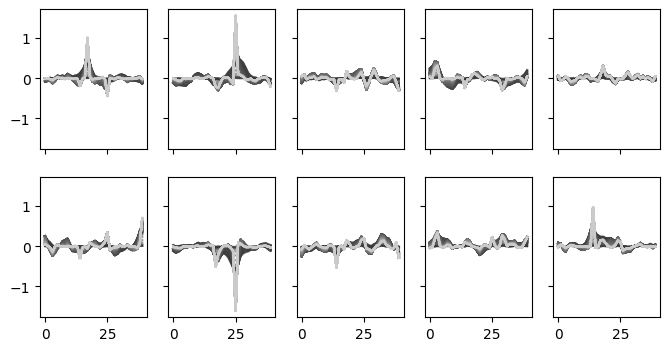

In [24]:
weights, metrics = simulate_or_load(
#   dataset_cls=datasets.NortaDataset, marginal_qdf=datasets.AlgQDF(30),
  dataset_cls=datasets.NonlinearGPDataset, gain=100,
  num_hiddens=10,
  init_scale=0.001,
  activation='relu',
  model_cls=models.MLP,
  use_bias=False, bias_trainable=False,#False, bias_value=-0.4,
  learning_rate=1., batch_size=1000, **config
)
fig, axs = plot_rf_evolution(weights, num_rows=2, num_cols=5, figsize=(8, 4))

w/ bias

NonlinearGPDataset[-1.00,01.00]_xi1=03.00_xi2=01.00_gain=100.000_p=0.50_batch_size=1000_num_epochs=2000_loss=mse_lr=1.000_MLP_L=040_K=010_activation=relu_init_scale=0.001_xavier_normal_init
File NonlinearGPDataset[-1.00,01.00]_xi1=03.00_xi2=01.00_gain=100.000_p=0.50_batch_size=1000_num_epochs=2000_loss=mse_lr=1.000_MLP_L=040_K=010_activation=relu_init_scale=0.001_xavier_normal_init.npz not found
Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'relu',
 'adjust': (-1.0, 1.0),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 1000,
 'bias_trainable': True,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 10,
 'gain': 100,
 'init_fn': <function xavier_normal_init at 0x142831620>,
 'init_scale': 0.001,
 'kwargs': {},
 'learning_rate': 1.0,
 'loss_fn': 'mse',
 'marginal_adjust': <function <lambda> a

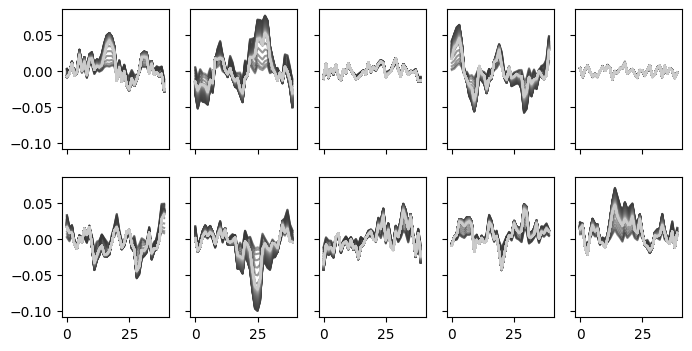

In [25]:
weights, metrics = simulate_or_load(
#   dataset_cls=datasets.NortaDataset, marginal_qdf=datasets.AlgQDF(30),
  dataset_cls=datasets.NonlinearGPDataset, gain=100,
  num_hiddens=10,
  init_scale=0.001,
  activation='relu',
  model_cls=models.MLP,
  use_bias=True, bias_trainable=True,#False, bias_value=-0.4,
  learning_rate=1., batch_size=1000, **config
)
fig, axs = plot_rf_evolution(weights, num_rows=2, num_cols=5, figsize=(8, 4))

NonlinearGPDataset[-1.00,01.00]_xi1=03.00_xi2=01.00_gain=100.000_p=0.50_batch_size=1000_num_epochs=2000_loss=mse_lr=10.000_MLP_L=040_K=010_activation=sigmoid_init_scale=1.000_xavier_normal_init
File NonlinearGPDataset[-1.00,01.00]_xi1=03.00_xi2=01.00_gain=100.000_p=0.50_batch_size=1000_num_epochs=2000_loss=mse_lr=10.000_MLP_L=040_K=010_activation=sigmoid_init_scale=1.000_xavier_normal_init.npz not found
Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'sigmoid',
 'adjust': (-1.0, 1.0),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 1000,
 'bias_trainable': True,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 10,
 'gain': 100,
 'init_fn': <function xavier_normal_init at 0x142831620>,
 'init_scale': 1.0,
 'kwargs': {},
 'learning_rate': 10.0,
 'loss_fn': 'mse',
 'marginal_adjust': <function 

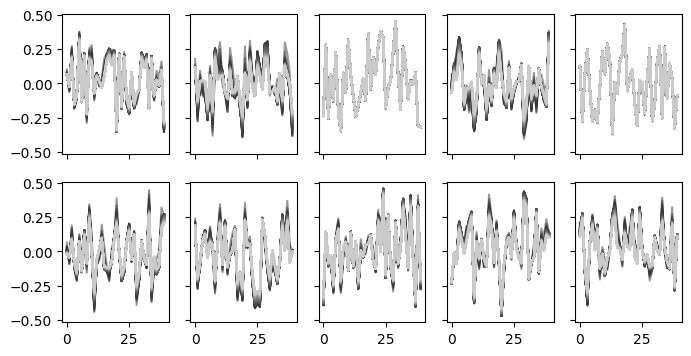

In [28]:
weights, metrics = simulate_or_load(
#   dataset_cls=datasets.NortaDataset, marginal_qdf=datasets.AlgQDF(30),
  dataset_cls=datasets.NonlinearGPDataset, gain=100,
  num_hiddens=10,
  init_scale=1.,
  activation='sigmoid',
  model_cls=models.MLP,
  use_bias=True, bias_trainable=True,#False, bias_value=-0.4,
  learning_rate=80., batch_size=1000, **config
)
fig, axs = plot_rf_evolution(weights, num_rows=2, num_cols=5, figsize=(8, 4))

#### 100 erf (NLGP)

NonlinearGPDataset[-1.00,01.00]_xi1=03.00_xi2=01.00_gain=100.000_p=0.50_batch_size=1000_num_epochs=5000_loss=mse_lr=5.000_SimpleNet-1.0_L=100_K=100_activation=sigmoid_init_scale=0.001_xavier_normal_init
File NonlinearGPDataset[-1.00,01.00]_xi1=03.00_xi2=01.00_gain=100.000_p=0.50_batch_size=1000_num_epochs=5000_loss=mse_lr=5.000_SimpleNet-1.0_L=100_K=100_activation=sigmoid_init_scale=0.001_xavier_normal_init.npz not found
Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'sigmoid',
 'adjust': (-1.0, 1.0),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 1000,
 'bias_trainable': False,
 'bias_value': -1.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 100,
 'gain': 100,
 'init_fn': <function xavier_normal_init at 0x14665d620>,
 'init_scale': 0.001,
 'kwargs': {},
 'learning_rate': 5.0,
 'loss_fn': 'mse',
 'margin

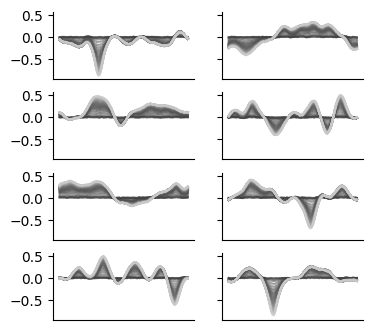

In [20]:
weights_sigmoid, metrics = simulate_or_load(
  dataset_cls=datasets.NonlinearGPDataset, gain=100,
  num_hiddens=100,
  init_scale=0.001,
  activation='sigmoid',
  model_cls=models.SimpleNet,
  use_bias=True, bias_trainable=False, bias_value=-1.0,
  learning_rate=100*0.05, batch_size=1000, **config
)

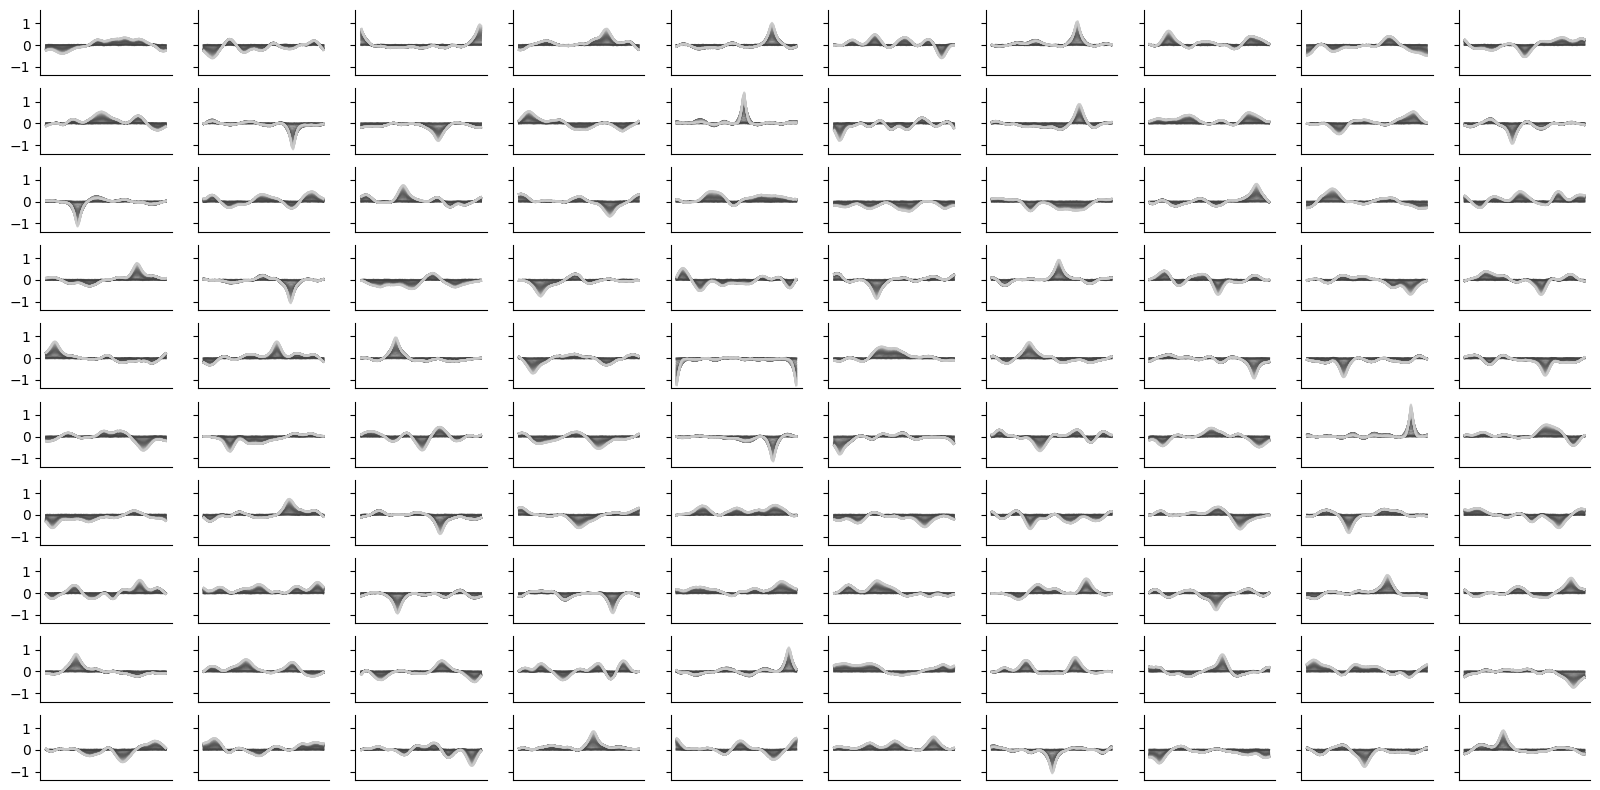

In [21]:
# ind = jax.random.randint(jax.random.PRNGKey(0), minval=0, maxval=100, shape=(8,))
fig, axs = plot_rf_evolution(weights_sigmoid, num_rows=10, num_cols=10, figsize=(20, 10)) # [:,ind,:]
for ax in axs.flatten():
    ax.set_xticks([])#; ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#### 100 ReLU (Alg(5)) - shouldn't localize (but might)

Approximate standard deviation: 0.6950598719782084
NortaDataset[-1.00,01.00]_xi1=03.00_xi2=01.00AlgQDF5_p=0.50_batch_size=1000_num_epochs=5000_loss=mse_lr=5.000_SimpleNetnobias_L=100_K=100_activation=relu_init_scale=0.001_xavier_normal_init
File NortaDataset[-1.00,01.00]_xi1=03.00_xi2=01.00AlgQDF5_p=0.50_batch_size=1000_num_epochs=5000_loss=mse_lr=5.000_SimpleNetnobias_L=100_K=100_activation=relu_init_scale=0.001_xavier_normal_init.npz not found
Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'relu',
 'adjust': (-1.0, 1.0),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 1000,
 'bias_trainable': False,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.norta.NortaDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 100,
 'gain': None,
 'init_fn': <function xavier_normal_init at 0x14665d620>,
 'init_scale': 0.001,
 'kwargs': {},
 'learning_rate': 5.0,
 'loss_fn': 'mse',

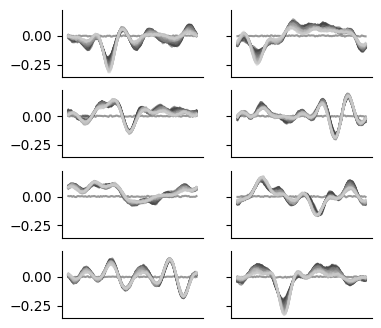

In [22]:
weights, metrics = simulate_or_load(
  dataset_cls=datasets.NortaDataset, marginal_qdf=datasets.AlgQDF(5),
  num_hiddens=100,
  init_scale=0.001,
  activation='relu',
  model_cls=models.SimpleNet,
  use_bias=False, bias_trainable=False, bias_value=0.0,
  learning_rate=100*0.05, batch_size=1000, **config
)

ind = jax.random.randint(jax.random.PRNGKey(0), minval=0, maxval=100, shape=(8,))
fig, axs = plot_rf_evolution(weights[:,ind,:], num_rows=4, num_cols=2, figsize=(4, 4))
for ax in axs.flatten():
    ax.set_xticks([]); ax.set_yticks([-0.25, 0, 0.25])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#### 100 ReLU (Alg(6)) - should localize

Approximate standard deviation: 0.6565969794448827
NortaDataset[-1.00,01.00]_xi1=03.00_xi2=01.00AlgQDF6_p=0.50_batch_size=1000_num_epochs=5000_loss=mse_lr=5.000_SimpleNetnobias_L=100_K=100_activation=relu_init_scale=0.001_xavier_normal_init
File NortaDataset[-1.00,01.00]_xi1=03.00_xi2=01.00AlgQDF6_p=0.50_batch_size=1000_num_epochs=5000_loss=mse_lr=5.000_SimpleNetnobias_L=100_K=100_activation=relu_init_scale=0.001_xavier_normal_init.npz not found
Simulating
Using JAX backend: cpu

Using configuration:
{'activation': 'relu',
 'adjust': (-1.0, 1.0),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 1000,
 'bias_trainable': False,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.norta.NortaDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 100,
 'gain': None,
 'init_fn': <function xavier_normal_init at 0x14665d620>,
 'init_scale': 0.001,
 'kwargs': {},
 'learning_rate': 5.0,
 'loss_fn': 'mse',

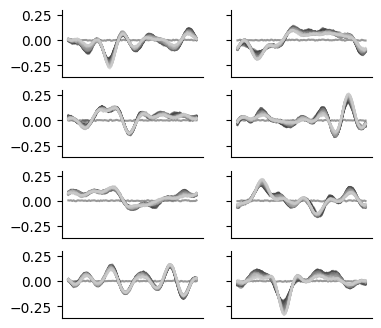

In [24]:
weights_alg, metrics = simulate_or_load(
  dataset_cls=datasets.NortaDataset, marginal_qdf=datasets.AlgQDF(6),
  num_hiddens=100,
  init_scale=0.1,
  activation='relu',
  model_cls=models.SimpleNet,
  use_bias=False, bias_trainable=False, bias_value=0.0,
  learning_rate=100*0.05, batch_size=1000, **config
)

ind = jax.random.randint(jax.random.PRNGKey(0), minval=0, maxval=100, shape=(8,))
fig, axs = plot_rf_evolution(weights_alg[:,ind,:], num_rows=4, num_cols=2, figsize=(4, 4))
for ax in axs.flatten():
    ax.set_xticks([])#; ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
fig.savefig('../figures/fig5/10erf_alg4.pdf')

### ICA

In [18]:
from sklearn.decomposition import FastICA

data_config = dict(
  # Data
  key=jax.random.PRNGKey(0),
  num_dimensions=40, 
  dim=1,
  xi=(1, 3,),
  adjust=(-1.0, 1.0),
  class_proportion=0.5,
  dataset_cls=datasets.NortaDataset,
)

Approximate standard deviation: 1.007363924323071


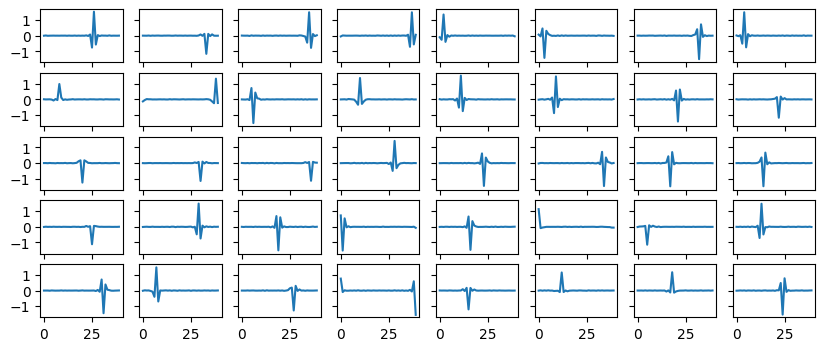

In [19]:
dataset = datasets.NortaDataset(marginal_qdf=datasets.AlgQDF(k=3), **data_config)
X = dataset[:100000][0]
transformer = FastICA(n_components=40, algorithm='parallel', random_state=0, whiten='unit-variance')
X_transformed = transformer.fit_transform(X)
W = transformer.components_
fig, axs = plt.subplots(5, 8, figsize=(10, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.plot(W[i])

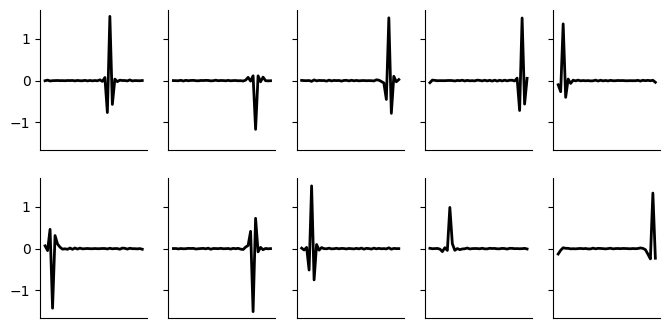

In [21]:
fig, axs = plt.subplots(2, 5, figsize=(8, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.plot(W[i], color='k', lw=2)
    ax.set_xticks([])
    # Drop spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
fig.savefig('../figures/fig5/ica_alg3.pdf', bbox_inches='tight')

In [116]:
# Picking components localized in center (looks nicer)
m = jnp.max(jnp.abs(W))
for i in range(10):
    fig, ax = plt.subplots(figsize=(2,2))
    im = ax.plot(W[i], color='k', lw=2)
    ax.set_xticks([]); ax.set_yticks([-1, 0, 1]); ax.set_ylim(-1.6, 1.6)
    # remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # cbar = plt.colorbar(im)
    fig.savefig(f'fig5/ica/{i+1}-1d-blob.pdf', bbox_inches='tight')#, size=(2, 2))
    plt.close(fig)

Approximate standard deviation: 1.007363924323071


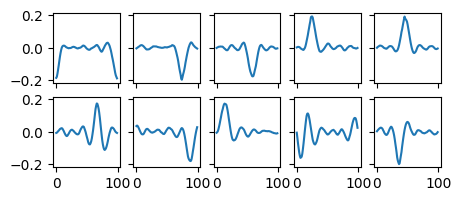

In [103]:
dataset = datasets.NortaDataset(marginal_qdf=datasets.AlgQDF(k=3), **data_config)
X = dataset[:100000][0]
transformer = FastICA(n_components=10, algorithm='deflation', random_state=0, whiten='unit-variance')
X_transformed = transformer.fit_transform(X)
W = transformer.components_
fig, axs = plt.subplots(2, 5, figsize=(5, 2), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.plot(W[i])

Approximate standard deviation: 1.007363924323071


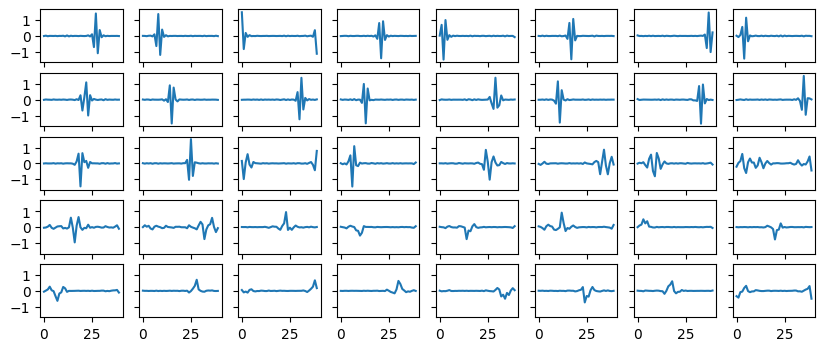

In [48]:
dataset = datasets.NortaDataset(marginal_qdf=datasets.AlgQDF(k=3), **data_config)
X = dataset[:100000][0]
transformer = FastICA(n_components=40, algorithm='deflation', random_state=0, whiten='unit-variance')
X_transformed = transformer.fit_transform(X)
W = transformer.components_
fig, axs = plt.subplots(5, 8, figsize=(10, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.plot(W[i])

Approximate standard deviation: 0.580435177819239


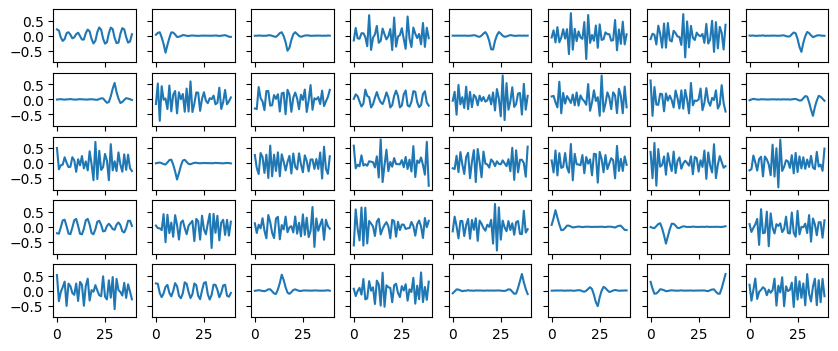

In [46]:
dataset = datasets.NortaDataset(marginal_qdf=datasets.AlgQDF(k=30), **data_config)
X = dataset[:1000000][0]
transformer = FastICA(n_components=40, algorithm='parallel', random_state=0, whiten='unit-variance')
X_transformed = transformer.fit_transform(X)
W = transformer.components_
fig, axs = plt.subplots(5, 8, figsize=(10, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.plot(W[i])

Approximate standard deviation: 0.580435177819239


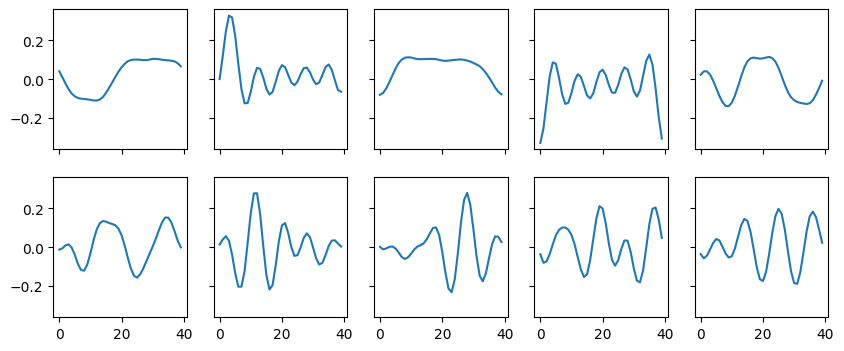

In [38]:
dataset = datasets.NortaDataset(marginal_qdf=datasets.AlgQDF(k=30), **data_config)
X = dataset[:100000][0]
transformer = FastICA(n_components=10, algorithm='deflation', random_state=0, whiten='unit-variance')
X_transformed = transformer.fit_transform(X)
W = transformer.components_
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.plot(W[i])

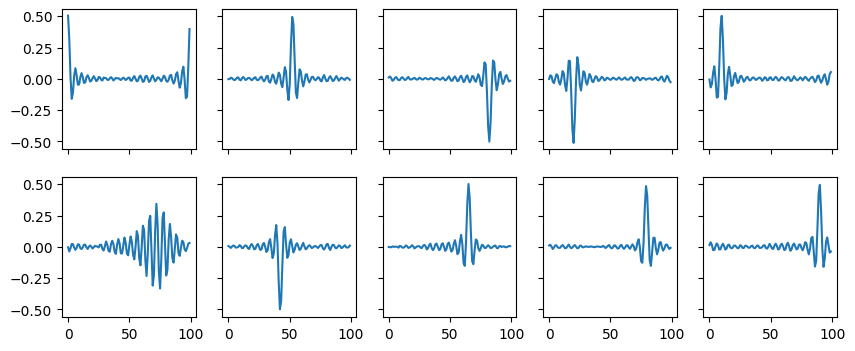

In [30]:
dataset = datasets.NonlinearGPDataset(gain=100, **data_config)
X = dataset[:100000][0]
transformer = FastICA(n_components=40, algorithm='deflation', random_state=0, whiten='unit-variance')
X_transformed = transformer.fit_transform(X)
W = transformer.components_
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.plot(W[i])

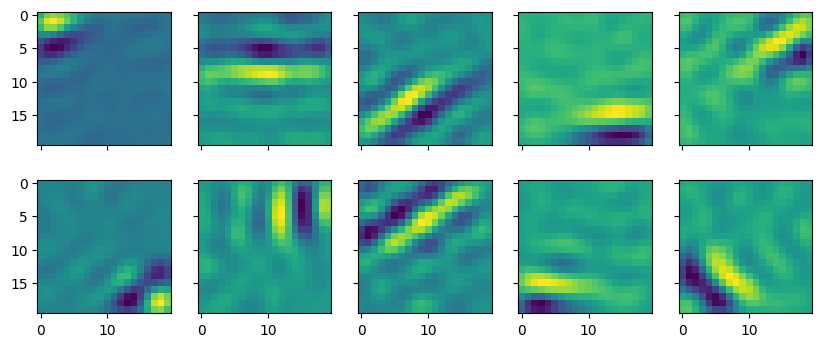

In [50]:
dataset = datasets.ScenesDataset(key=jax.random.PRNGKey(0), side_length=20,)
X = dataset[:100000][0]
transformer = FastICA(n_components=40, algorithm='parallel', random_state=0, whiten='unit-variance')
X_transformed = transformer.fit_transform(X)
W = transformer.components_
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(W[i].reshape(20,20))

In [31]:
# dataset = datasets.NonlinearGPDataset(key=jax.random.PRNGKey(0), num_dimensions=16, dim=2, xi=(1.1,0.1), gain=100)
dataset = datasets.NortaDataset(key=jax.random.PRNGKey(0), num_dimensions=16, dim=2, xi=(1.1,0.1), marginal_qdf=datasets.AlgQDF(k=3))
X = dataset[:100000][0]
transformer = FastICA(n_components=40, algorithm='parallel', random_state=0, whiten='unit-variance')
X_transformed = transformer.fit_transform(X)
W = transformer.components_
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(W[i].reshape(16,16))

Approximate standard deviation: 1.007363924323071


NameError: name 'FastICA' is not defined

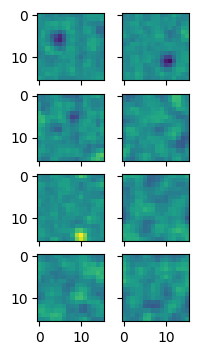

In [42]:
# dataset = datasets.NonlinearGPDataset(key=jax.random.PRNGKey(0), num_dimensions=16, dim=2, xi=(0.7,0.1), gain=100)
# X = dataset[:100000][0]
# transformer = FastICA(n_components=40, algorithm='parallel', random_state=0, whiten='unit-variance')
# X_transformed = transformer.fit_transform(X)
# W = transformer.components_
ind = [1, 2, 3, 0, 7, 8, 10, 13]
m = jnp.max(jnp.abs(W[ind]))
fig, axs = plt.subplots(4, 2, figsize=(2, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(W[ind[i]].reshape(16,16), vmin=-m, vmax=m)

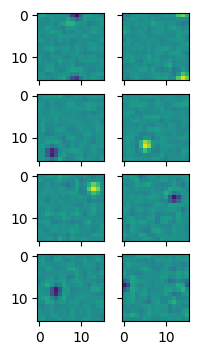

In [87]:
dataset = datasets.NonlinearGPDataset(key=jax.random.PRNGKey(0), num_dimensions=16, dim=2, xi=(0.7,0.5), gain=100)
X = dataset[:100000][0]
transformer = FastICA(n_components=80, algorithm='parallel', random_state=0, whiten='unit-variance') # sequential doesn't work
X_transformed = transformer.fit_transform(X)
W = transformer.components_
m = jnp.max(jnp.abs(W))
fig, axs = plt.subplots(4, 2, figsize=(2, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(W[i].reshape(16,16), vmin=-m, vmax=m)

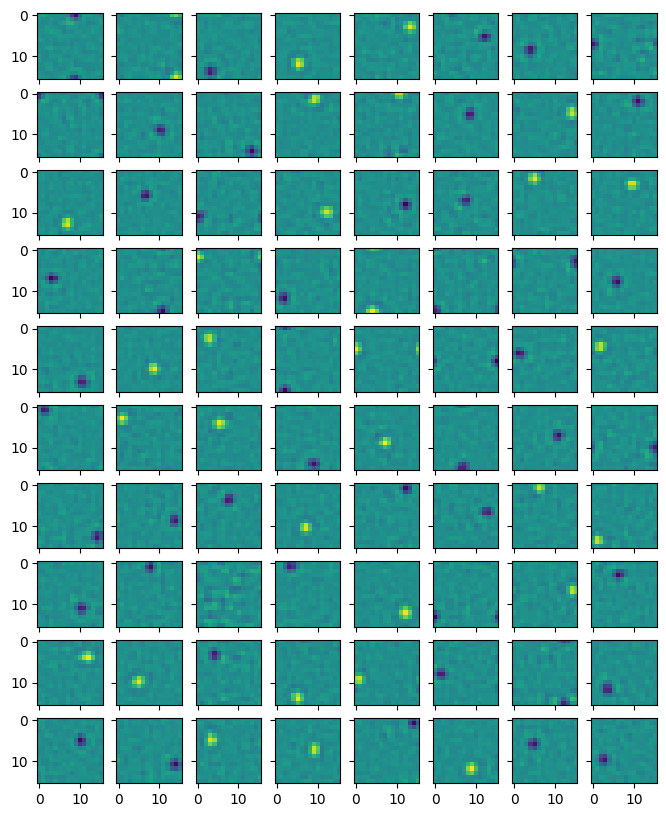

In [90]:
fig, axs = plt.subplots(10, 8, figsize=(8, 10), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(W[i].reshape(16,16), vmin=-m, vmax=m)

In [91]:
ind = [2, 3, 4, 5, 6, 9, 16, 17] # Picking components localized in center (looks nicer)
m = jnp.max(jnp.abs(W))
for i in range(8):
    im = plt.imshow(W[ind[i]].reshape(16, 16), cmap=cb.cbmap('cb.solstice'), vmin=-m, vmax=m)
    plt.xticks([]); plt.yticks([]); plt.axis('off')
    # cbar = plt.colorbar(im)
    plt.savefig(f'fig1/ica_16x16_g=100_xi=0.7,0.5/{i+1}-2d-blob.pdf', bbox_inches='tight')
    plt.close()

/var/folders/gq/3xlhh9496_j9xpjb7tkbqh280000gn/T/ipykernel_58106/3487073785.py:4: DeprecationWarning: cblind.cbmap is deprecated. Please use matplotlib.colormaps.get_cmap instead, or matplotlib.pyplot.get_cmap if you need to specify nbin (default is 256)
  im = plt.imshow(W[ind[i]].reshape(16, 16), cmap=cb.cbmap('cb.solstice'), vmin=-m, vmax=m)


In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(2, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(W[i].reshape(int(scale*16),int(scale*16)), vmin=-m, vmax=m, cmap=cb.cbmap('cb.solstice'))
    ax.set_xticks([]); ax.set_yticks([])
    # remove the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
fig.savefig(f'../figures/fig5/ica_16x16_g=100_xi=0.7,0.1/{}.pdf', bbox_inches='tight')

/Users/leonlufkin/opt/anaconda3/envs/jax-pr/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


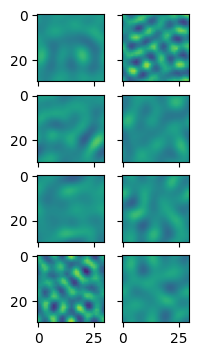

In [52]:
dataset = datasets.NonlinearGPDataset(key=jax.random.PRNGKey(0), num_dimensions=30, dim=2, xi=(5,0.2), gain=100)
X = dataset[:100000][0]
transformer = FastICA(n_components=80, algorithm='parallel', random_state=0, whiten='unit-variance') # sequential doesn't work
X_transformed = transformer.fit_transform(X)
W = transformer.components_
m = jnp.max(jnp.abs(W))
fig, axs = plt.subplots(4, 2, figsize=(2, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(W[i].reshape(30,30), vmin=-m, vmax=m)
fig.savefig('../figures/fig5/ica_30x30_g=100.pdf')

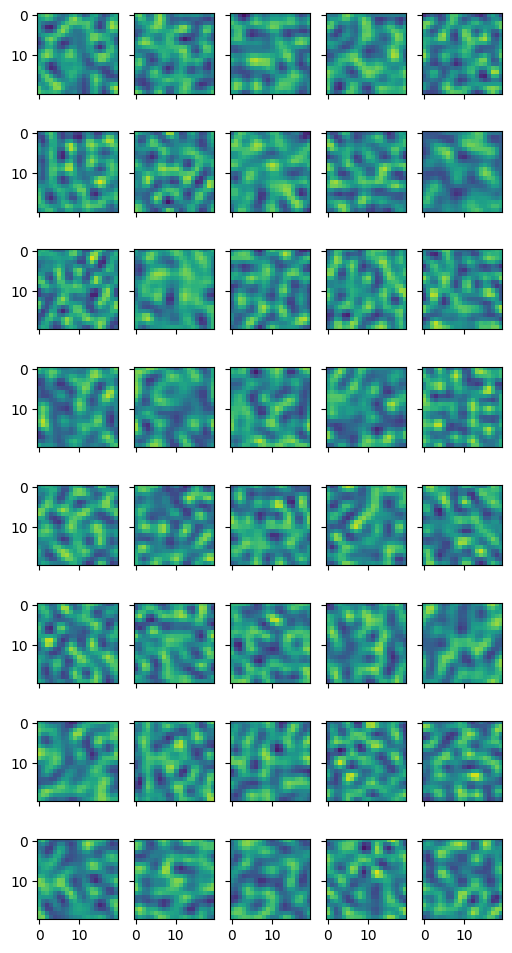

In [57]:
dataset = datasets.NonlinearGPDataset(key=jax.random.PRNGKey(0), num_dimensions=20, dim=2, xi=(1,0.15), gain=100)
X = dataset[:1000000][0]
transformer = FastICA(n_components=80, algorithm='parallel', random_state=0, whiten='unit-variance') # sequential doesn't work
X_transformed = transformer.fit_transform(X)
W = transformer.components_
m = jnp.max(jnp.abs(W))
fig, axs = plt.subplots(8, 5, figsize=(6, 12), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(W[i].reshape(20,20), vmin=-m, vmax=m)

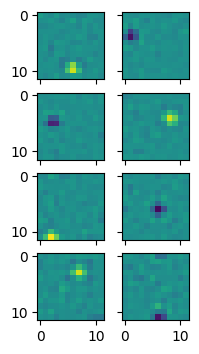

In [82]:
scale = 0.8 # num_dimensions must be even
dataset = datasets.NonlinearGPDataset(key=jax.random.PRNGKey(0), num_dimensions=int(scale*16), dim=2, xi=(0.7,0.1), gain=100)
X = dataset[:100000][0]
transformer = FastICA(n_components=int(scale*80), algorithm='parallel', random_state=0, whiten='unit-variance') # sequential doesn't work
X_transformed = transformer.fit_transform(X)
W = transformer.components_
m = jnp.max(jnp.abs(W))
fig, axs = plt.subplots(4, 2, figsize=(2, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(W[i].reshape(int(scale*16),int(scale*16)), vmin=-m, vmax=m)

/var/folders/gq/3xlhh9496_j9xpjb7tkbqh280000gn/T/ipykernel_58106/2175892361.py:3: DeprecationWarning: cblind.cbmap is deprecated. Please use matplotlib.colormaps.get_cmap instead, or matplotlib.pyplot.get_cmap if you need to specify nbin (default is 256)
  ax.imshow(W[i].reshape(int(scale*16),int(scale*16)), vmin=-m, vmax=m, cmap=cb.cbmap('cb.solstice'))


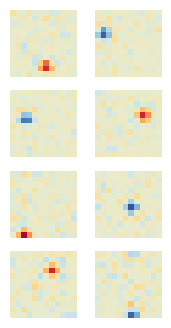

In [83]:
fig, axs = plt.subplots(4, 2, figsize=(2, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(W[i].reshape(int(scale*16),int(scale*16)), vmin=-m, vmax=m, cmap=cb.cbmap('cb.solstice'))
    ax.set_xticks([]); ax.set_yticks([])
    # remove the spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
fig.savefig('../figures/fig1/ica_12x12_g=100_xi=0.7,0.1.pdf', bbox_inches='tight')

In [86]:
m = jnp.max(jnp.abs(W))
for i in range(8):
    im = plt.imshow(W[i].reshape(12, 12), cmap=cb.cbmap('cb.solstice'), vmin=-m, vmax=m)
    plt.xticks([]); plt.yticks([]); plt.axis('off')
    # cbar = plt.colorbar(im)
    plt.savefig(f'fig5/{i+1}-2d-blob.pdf', bbox_inches='tight')
    plt.close()

/var/folders/gq/3xlhh9496_j9xpjb7tkbqh280000gn/T/ipykernel_58106/2145325042.py:3: DeprecationWarning: cblind.cbmap is deprecated. Please use matplotlib.colormaps.get_cmap instead, or matplotlib.pyplot.get_cmap if you need to specify nbin (default is 256)
  im = plt.imshow(W[i].reshape(12, 12), cmap=cb.cbmap('cb.solstice'), vmin=-m, vmax=m)


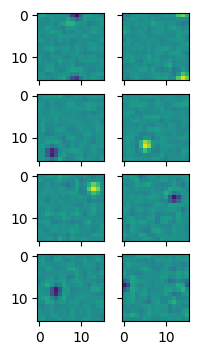

In [77]:
scale = 1. # num_dimensions must be even
dataset = datasets.NonlinearGPDataset(key=jax.random.PRNGKey(0), num_dimensions=int(scale*16), dim=2, xi=(0.7,0.1*5.), gain=100) # 0.1*2. works
X = dataset[:100000][0]
transformer = FastICA(n_components=80, algorithm='parallel', random_state=0, whiten='unit-variance') # sequential doesn't work
X_transformed = transformer.fit_transform(X)
W = transformer.components_
m = jnp.max(jnp.abs(W))
fig, axs = plt.subplots(4, 2, figsize=(2, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(W[i].reshape(int(scale*16),int(scale*16)), vmin=-m, vmax=m)

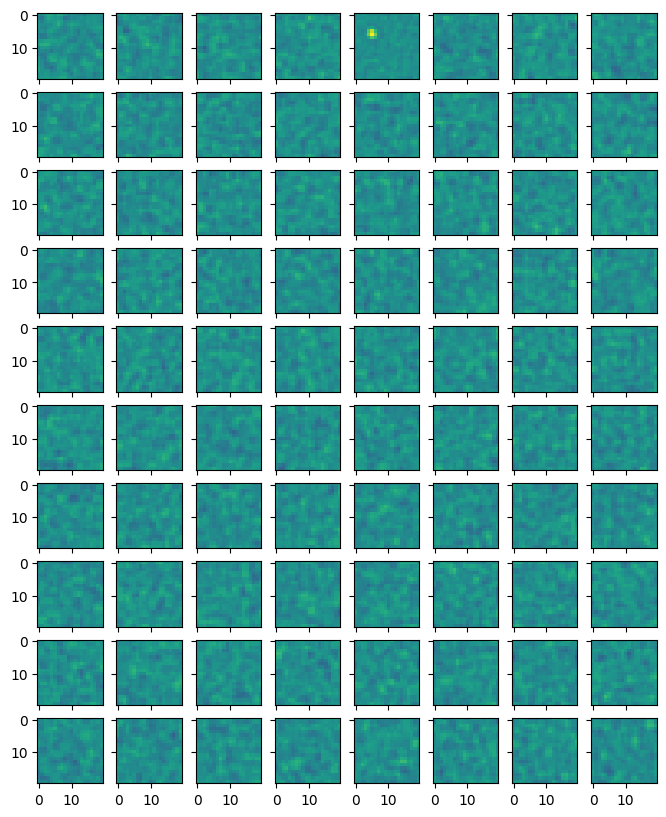

In [74]:
fig, axs = plt.subplots(10, 8, figsize=(8, 10), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.imshow(W[i].reshape(int(scale*16),int(scale*16)), vmin=-m, vmax=m)